min cuadrados - isa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ajuste_exponencial_minimos_cuadrados(xs, ys):
    """
    Ajusta datos a y = a * e^(bx) usando mínimos cuadrados.
    Lineariza tomando ln(y) = ln(a) + bx
    """
    # Convertir a arrays
    xs = np.array(xs)
    ys = np.array(ys)
    
    # Filtrar valores no positivos
    mask = ys > 0
    xs_filtrado = xs[mask]
    ys_filtrado = ys[mask]
    
    if len(xs_filtrado) == 0:
        raise ValueError("No hay valores positivos de y para ajustar")
    
    # Linearizar: ln(y) = ln(a) + bx
    ln_y = np.log(ys_filtrado)
    
    n = len(xs_filtrado)
    
    # Sistema de ecuaciones normales
    suma_x = np.sum(xs_filtrado)
    suma_ln_y = np.sum(ln_y)
    suma_x2 = np.sum(xs_filtrado**2)
    suma_x_ln_y = np.sum(xs_filtrado * ln_y)
    
    # Resolver para b y ln(a)
    # b * suma_x2 + ln(a) * suma_x = suma_x_ln_y
    # b * suma_x + ln(a) * n = suma_ln_y
    
    denominador = n * suma_x2 - suma_x**2
    
    b = (n * suma_x_ln_y - suma_x * suma_ln_y) / denominador
    ln_a = (suma_ln_y - b * suma_x) / n
    a = np.exp(ln_a)
    
    return a, b




Ejemplo 1 - a: 52.8418, b: -0.4926
Ecuación: y = 52.8418 * e^(-0.4926x)



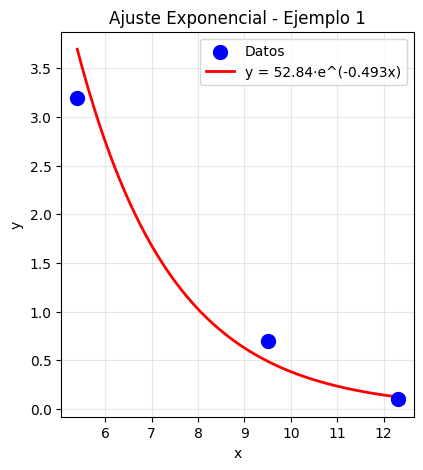

In [2]:
# Ejemplo 1: Datos pequeños
xs1 = [5.4, 9.5, 12.3]
ys1 = [3.2, 0.7, 0.1]  # Ajustado para tener valores positivos

a1, b1 = ajuste_exponencial_minimos_cuadrados(xs1, ys1)
print(f"Ejemplo 1 - a: {a1:.4f}, b: {b1:.4f}")
print(f"Ecuación: y = {a1:.4f} * e^({b1:.4f}x)\n")

# Graficar ejemplo 1
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(xs1, ys1, color='blue', s=100, label='Datos', zorder=3)
x_line = np.linspace(min(xs1), max(xs1), 100)
y_line = a1 * np.exp(b1 * x_line)
plt.plot(x_line, y_line, 'r-', label=f'y = {a1:.2f}·e^({b1:.3f}x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Exponencial - Ejemplo 1')
plt.legend()
plt.grid(True, alpha=0.3)

Ejemplo 2 - a: 1.7919, b: -0.6103
Ecuación: y = 1.7919 * e^(-0.6103x)


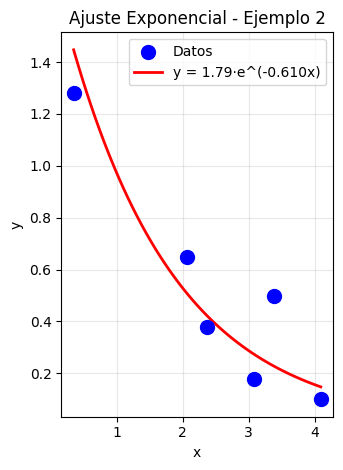

In [3]:
# Ejemplo 2: Datos más grandes (solo positivos)
xs2 = [3.38, 0.35, 2.07, 3.08, 2.37, 4.09]
ys2 = [0.5, 1.28, 0.65, 0.18, 0.38, 0.1]

a2, b2 = ajuste_exponencial_minimos_cuadrados(xs2, ys2)
print(f"Ejemplo 2 - a: {a2:.4f}, b: {b2:.4f}")
print(f"Ecuación: y = {a2:.4f} * e^({b2:.4f}x)")

# Graficar ejemplo 2
plt.subplot(1, 2, 2)
plt.scatter(xs2, ys2, color='blue', s=100, label='Datos', zorder=3)
x_line2 = np.linspace(min(xs2), max(xs2), 100)
y_line2 = a2 * np.exp(b2 * x_line2)
plt.plot(x_line2, y_line2, 'r-', label=f'y = {a2:.2f}·e^({b2:.3f}x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Exponencial - Ejemplo 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

interpolación - isa

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def interpolacion_exponencial_dos_puntos(x1, y1, x2, y2):
    """
    Interpola dos puntos con una función exponencial y = a * e^(bx)
    """
    if y1 <= 0 or y2 <= 0:
        raise ValueError("Ambos valores de y deben ser positivos")
    
    # De y = a * e^(bx):
    # ln(y1) = ln(a) + b*x1
    # ln(y2) = ln(a) + b*x2
    
    ln_y1 = np.log(y1)
    ln_y2 = np.log(y2)
    
    # b = (ln(y2) - ln(y1)) / (x2 - x1)
    b = (ln_y2 - ln_y1) / (x2 - x1)
    
    # ln(a) = ln(y1) - b*x1
    ln_a = ln_y1 - b * x1
    a = np.exp(ln_a)
    
    return a, b

def interpolacion_exponencial_n_puntos(xs, ys):
    """
    Interpola n puntos usando splines exponenciales por pares consecutivos
    """
    xs = np.array(xs)
    ys = np.array(ys)
    
    # Ordenar por x
    idx = np.argsort(xs)
    xs = xs[idx]
    ys = ys[idx]
    
    # Filtrar valores positivos
    mask = ys > 0
    xs = xs[mask]
    ys = ys[mask]
    
    if len(xs) < 2:
        raise ValueError("Se necesitan al menos 2 puntos con y > 0")
    
    # Guardar segmentos
    segmentos = []
    for i in range(len(xs) - 1):
        a, b = interpolacion_exponencial_dos_puntos(xs[i], ys[i], xs[i+1], ys[i+1])
        segmentos.append({
            'x_min': xs[i],
            'x_max': xs[i+1],
            'a': a,
            'b': b
        })
    
    return segmentos, xs, ys

def evaluar_interpolacion(x_eval, segmentos):
    """Evalúa la función interpolada en x_eval"""
    for seg in segmentos:
        if seg['x_min'] <= x_eval <= seg['x_max']:
            return seg['a'] * np.exp(seg['b'] * x_eval)
    # Extrapolación
    if x_eval < segmentos[0]['x_min']:
        seg = segmentos[0]
    else:
        seg = segmentos[-1]
    return seg['a'] * np.exp(seg['b'] * x_eval)



Ejemplo 1: Interpolación con 3 puntos
Segmento 1 [1.00, 3.00]: y = 1.0000 * e^(0.6931x)
Segmento 2 [3.00, 5.00]: y = 1.0000 * e^(0.6931x)


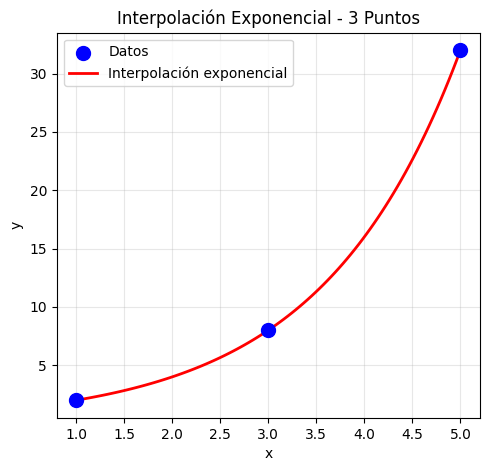

In [5]:
# Ejemplo 1: Interpolación con 3 puntos
xs1 = [1, 3, 5]
ys1 = [2, 8, 32]

segmentos1, xs_ord1, ys_ord1 = interpolacion_exponencial_n_puntos(xs1, ys1)

print("Ejemplo 1: Interpolación con 3 puntos")
for i, seg in enumerate(segmentos1):
    print(f"Segmento {i+1} [{seg['x_min']:.2f}, {seg['x_max']:.2f}]: "
          f"y = {seg['a']:.4f} * e^({seg['b']:.4f}x)")

# Graficar
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(xs_ord1, ys_ord1, color='blue', s=100, label='Datos', zorder=3)

# Evaluar en cada segmento
for seg in segmentos1:
    x_seg = np.linspace(seg['x_min'], seg['x_max'], 50)
    y_seg = seg['a'] * np.exp(seg['b'] * x_seg)
    plt.plot(x_seg, y_seg, 'r-', linewidth=2)

plt.plot([], [], 'r-', linewidth=2, label='Interpolación exponencial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación Exponencial - 3 Puntos')
plt.legend()
plt.grid(True, alpha=0.3)




Ejemplo 2: Interpolación con 5 puntos
Segmento 1 [0.00, 1.00]: y = 1.0000 * e^(0.9933x)
Segmento 2 [1.00, 2.00]: y = 0.9851 * e^(1.0082x)
Segmento 3 [2.00, 3.00]: y = 1.0131 * e^(0.9943x)
Segmento 4 [3.00, 4.00]: y = 0.9830 * e^(1.0043x)


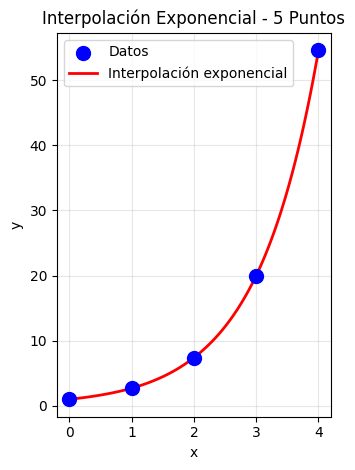

In [6]:
# Ejemplo 2: Más puntos
xs2 = [0, 1, 2, 3, 4]
ys2 = [1, 2.7, 7.4, 20, 54.6]

segmentos2, xs_ord2, ys_ord2 = interpolacion_exponencial_n_puntos(xs2, ys2)

print("\nEjemplo 2: Interpolación con 5 puntos")
for i, seg in enumerate(segmentos2):
    print(f"Segmento {i+1} [{seg['x_min']:.2f}, {seg['x_max']:.2f}]: "
          f"y = {seg['a']:.4f} * e^({seg['b']:.4f}x)")

plt.subplot(1, 2, 2)
plt.scatter(xs_ord2, ys_ord2, color='blue', s=100, label='Datos', zorder=3)

for seg in segmentos2:
    x_seg = np.linspace(seg['x_min'], seg['x_max'], 50)
    y_seg = seg['a'] * np.exp(seg['b'] * x_seg)
    plt.plot(x_seg, y_seg, 'r-', linewidth=2)

plt.plot([], [], 'r-', linewidth=2, label='Interpolación exponencial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación Exponencial - 5 Puntos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()